In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv
load_dotenv();

In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
cd C:\\Users\\anniw\\IFT6758-A2022-G08

C:\Users\anniw\IFT6758-A2022-G08


In [5]:
import src.features.build_features as FeaturesManager

In [6]:
seasons_year = [2015, 2016, 2017, 2018]
season_type = "Regular"
df = FeaturesManager.build_features(seasons_year, season_type)

In [7]:
df.head()

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Shooter ID,Shooter Side,Shooter Ice Position,...,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Shooter Goal Ratio Last Season,Goalie Goal Ratio Last Season,Num players With,Num players Against,Elapsed time since Power Play
0,2015020001,7,1,Toronto Maple Leafs (TOR),Shot,Wrist Shot,Brad Boyes,8468504,R,R,...,51,10.525108,0.0,0.000000,13.415281,0.092715,0.066564,5.0,5.0,0.0
1,2015020001,9,1,Toronto Maple Leafs (TOR),Shot,Snap Shot,Nazem Kadri,8475172,L,C,...,65,28.300756,0.0,0.000000,6.730362,0.102273,0.066564,5.0,5.0,0.0
2,2015020001,10,1,Toronto Maple Leafs (TOR),Shot,Snap Shot,Nazem Kadri,8475172,L,C,...,66,0.000000,1.0,4.085617,2.748737,0.102273,0.066564,5.0,5.0,0.0
3,2015020001,13,1,Toronto Maple Leafs (TOR),Shot,Wrist Shot,Daniel Winnik,8471476,L,L,...,113,-93.270488,0.0,0.000000,4.302988,0.092784,0.066564,5.0,5.0,0.0
4,2015020001,21,1,Toronto Maple Leafs (TOR),Shot,Tip-In,Joffrey Lupul,8470207,R,L,...,157,47.726311,0.0,0.000000,4.085855,0.103093,0.066564,5.0,5.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305860 entries, 0 to 305859
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Game ID                         305860 non-null  object 
 1   Event Index                     305860 non-null  int64  
 2   Period                          305860 non-null  int64  
 3   Team                            305860 non-null  object 
 4   Type                            305860 non-null  object 
 5   Shot Type                       305827 non-null  object 
 6   Shooter                         305860 non-null  object 
 7   Shooter ID                      305860 non-null  int64  
 8   Shooter Side                    305860 non-null  object 
 9   Shooter Ice Position            305860 non-null  object 
 10  Goalie                          305860 non-null  object 
 11  Goalie ID                       305860 non-null  int64  
 12  Strength        

In [9]:
df['Shot distance'].max()

189.6549498431296

In [10]:
df['Shot distance'].min()

0.0

In [11]:
df['Shot angle'].max()

180.0

In [12]:
df['Shot angle'].min()

-161.565051177078

In [13]:
distance_bins = list(range(0, 195, 5))
angle_bins = list(range(0, 185, 5)) # All but the last (righthand-most) bin is half-open in Numpy

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'Goals')

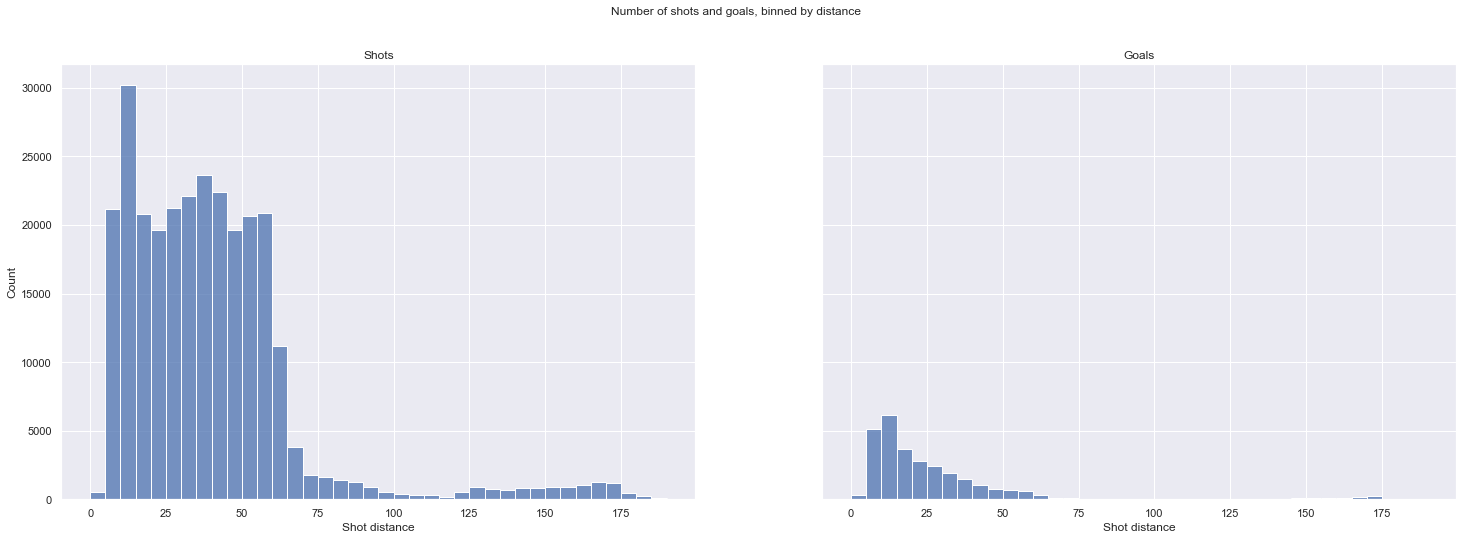

In [15]:
# Q1 - Hist1
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by distance')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Goals')

Text(0.5, 1.0, 'Goals')

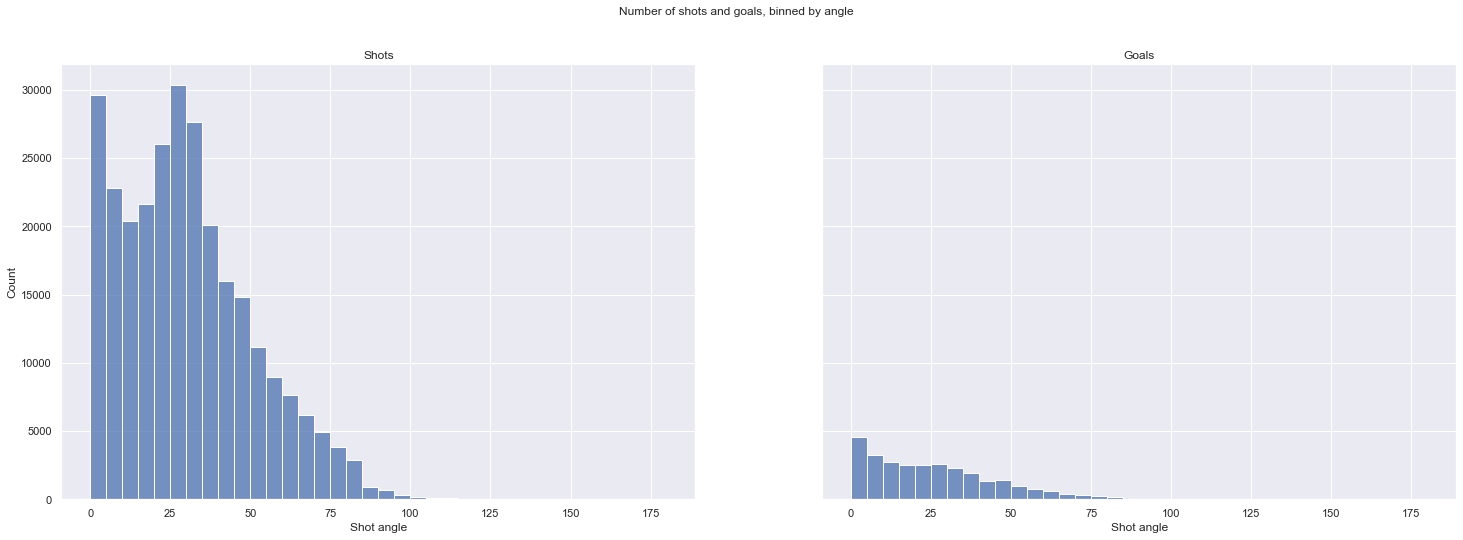

In [16]:
# Q1 - Hist2
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by angle')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot angle"].abs(), bins=angle_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot angle"].abs(), bins=angle_bins)
axes[1].set_title('Goals')

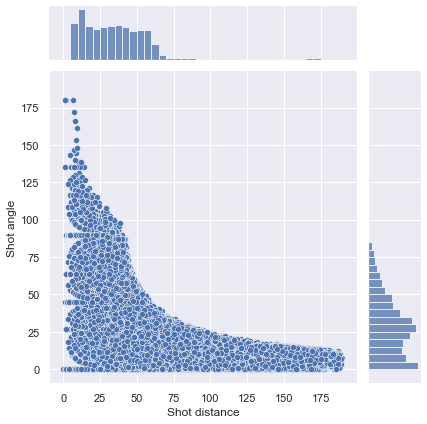

In [17]:
# Q1 - Hist3
sns.jointplot(data=df, x=df["Shot distance"], y=df["Shot angle"].abs(), marginal_kws=dict(bins=distance_bins)) # I took the absolute value

In [18]:
# Q2
distance_bins_2 = list(range(0, 195, 10))
angle_bins_2 = list(range(0, 185, 10))
df['Angle Bins'] = pd.cut(df['Shot angle'].abs(), bins=angle_bins_2, include_lowest=True)
df['Distance Bins'] = pd.cut(df['Shot distance'], bins=distance_bins_2, include_lowest=True)

In [19]:
df_angle = pd.pivot_table(df, values='Is Goal', index='Angle Bins', columns='Type',  aggfunc='count').reset_index()
df_angle.columns.name=None
df_angle

,Angle Bins,Goal,Shot
0,"(-0.001, 10.0]",7830,52399
1,"(10.0, 20.0]",5254,41982
2,"(20.0, 30.0]",5090,56384
3,"(30.0, 40.0]",4214,47708
4,"(40.0, 50.0]",2742,30830
5,"(50.0, 60.0]",1697,20155
6,"(60.0, 70.0]",965,13742
7,"(70.0, 80.0]",518,8783
8,"(80.0, 90.0]",213,4270
9,"(90.0, 100.0]",57,498


In [20]:
df_distance = pd.pivot_table(df, values='Is Goal', index='Distance Bins', columns='Type',  aggfunc='count').reset_index()
df_distance.columns.name=None
df_distance

,Distance Bins,Goal,Shot
0,"(-0.001, 10.0]",5687,23003
1,"(10.0, 20.0]",9598,50136
2,"(20.0, 30.0]",5111,40656
3,"(30.0, 40.0]",3346,45775
4,"(40.0, 50.0]",1763,42038
5,"(50.0, 60.0]",1328,41332
6,"(60.0, 70.0]",394,14922
7,"(70.0, 80.0]",109,3352
8,"(80.0, 90.0]",100,2722
9,"(90.0, 100.0]",93,1385


In [21]:
def calculate_percentage(a, b):
    try:
        result = (a/(a+b))*100
    except:
        result = np.nan
    return result

In [22]:
df_angle['Goal Percentage'] = df_angle.apply(lambda row : calculate_percentage(row['Goal'], row['Shot']), axis=1)
df_distance['Goal Percentage'] = df_distance.apply(lambda row : calculate_percentage(row['Goal'], row['Shot']), axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]'),
  Text(18, 0, '(180.0, 190.0]')])

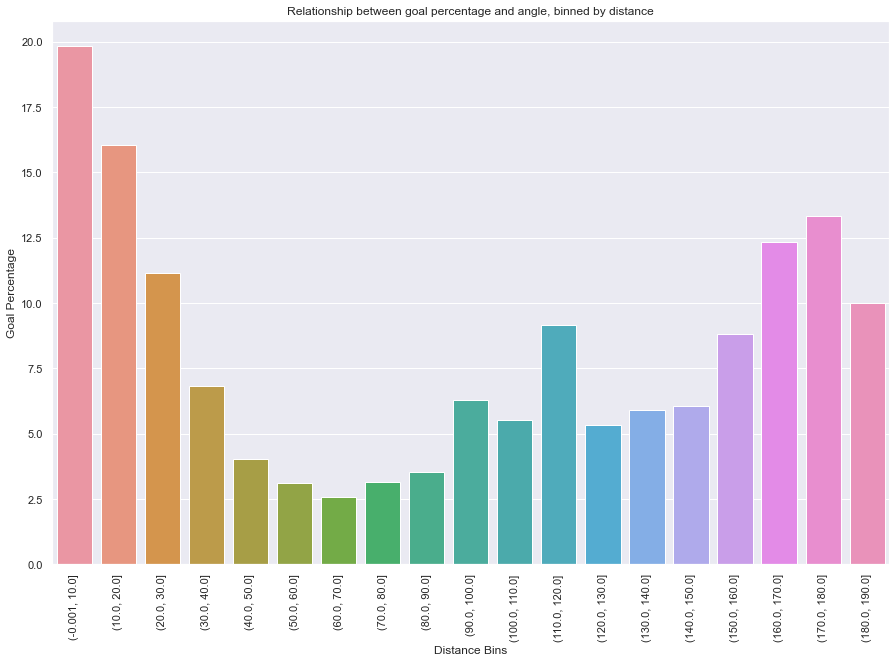

In [23]:
# Q2 - Hist1
plt.figure(figsize=(15, 10))
sns.barplot(data=df_distance, x="Distance Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by distance')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]')])

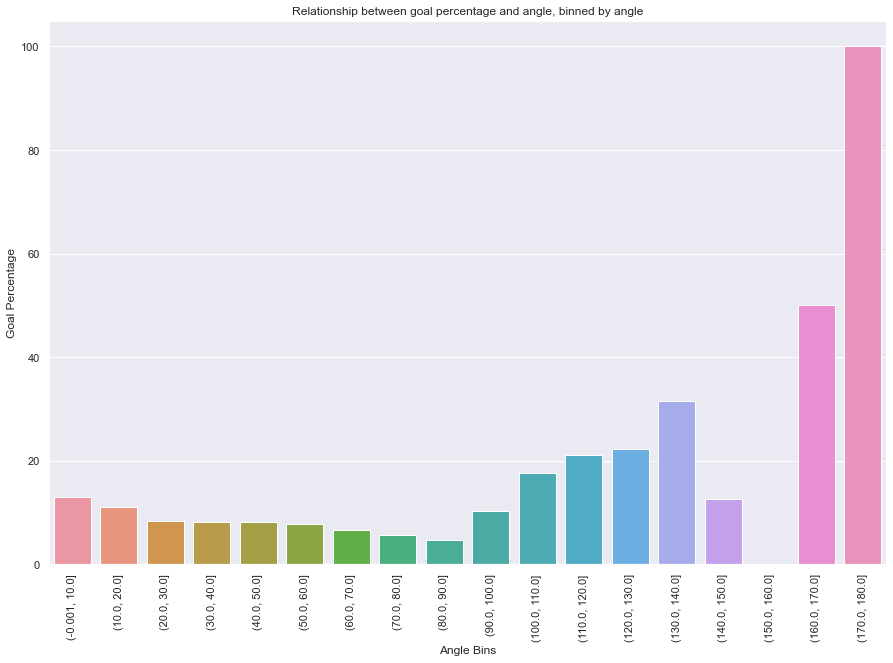

In [24]:
# Q2 - Hist2
plt.figure(figsize=(15, 10))
sns.barplot(data=df_angle, x="Angle Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by angle')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Empty Net')

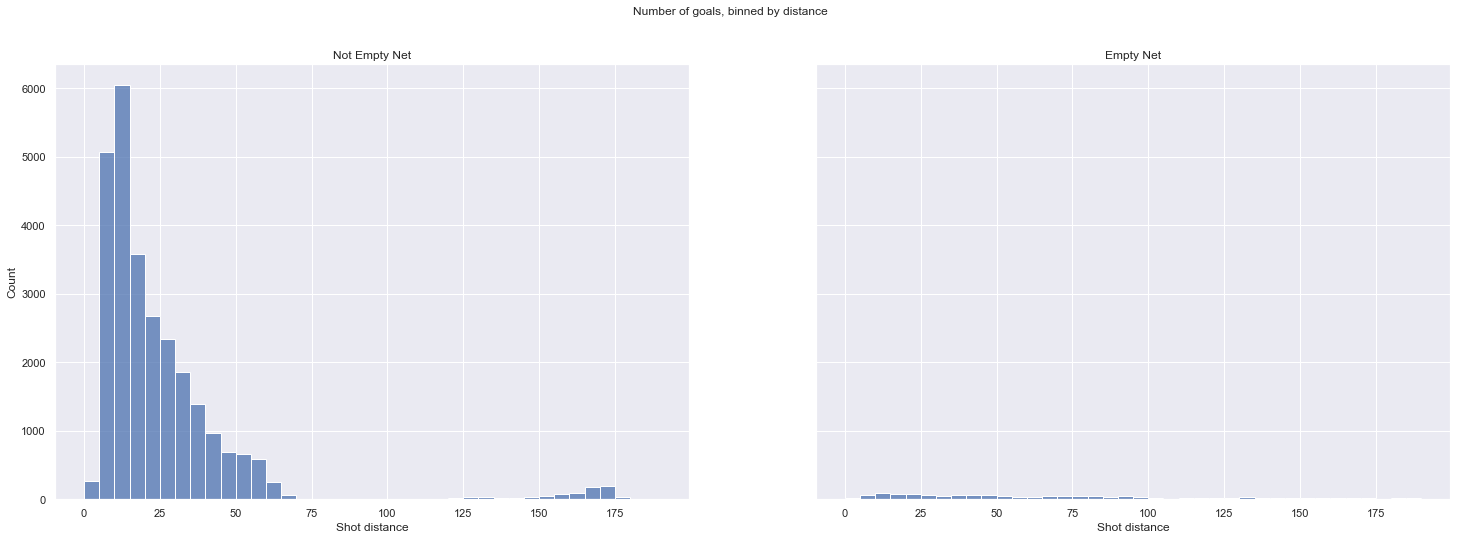

In [25]:
# Q3
df_goals = df[df['Is Goal'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of goals, binned by distance')

sns.histplot(ax=axes[0], data=df_goals, x=df_goals[df_goals['Is Empty'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Not Empty Net')

sns.histplot(ax=axes[1], data=df_goals, x=df_goals[df_goals['Is Empty'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Empty Net')

In [26]:
# Check for goal in defensive net without empty net
df_goals[(df_goals['Is Empty'] == 0) & (df_goals['st_X'] < -25)]

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Shooter ID,Shooter Side,Shooter Ice Position,...,Rebound,Change in Shot Angle,Speed From Previous Event,Shooter Goal Ratio Last Season,Goalie Goal Ratio Last Season,Num players With,Num players Against,Elapsed time since Power Play,Angle Bins,Distance Bins
19,2015020001,123,2,Toronto Maple Leafs (TOR),Goal,Deflected,James van Riemsdyk,8474037,L,L,...,0.0,0.000000,4.038278,0.108871,0.066564,5.0,4.0,6.0,"(-0.001, 10.0]","(160.0, 170.0]"
707,2015020013,104,1,New York Rangers (NYR),Goal,Backhand,Mats Zuccarello,8475692,L,R,...,0.0,0.000000,0.775963,0.097403,0.082108,5.0,5.0,0.0,"(-0.001, 10.0]","(150.0, 160.0]"
721,2015020013,161,2,Columbus Blue Jackets (CBJ),Goal,Wrist Shot,Cam Atkinson,8474715,R,R,...,0.0,0.000000,33.681582,0.103774,0.077502,5.0,5.0,0.0,"(-0.001, 10.0]","(160.0, 170.0]"
746,2015020013,280,3,Columbus Blue Jackets (CBJ),Goal,Snap Shot,Brandon Saad,8476438,L,L,...,0.0,0.000000,0.976524,0.113300,0.077502,5.0,4.0,12.0,"(-0.001, 10.0]","(150.0, 160.0]"
747,2015020013,286,3,New York Rangers (NYR),Goal,Wrist Shot,Oscar Lindberg,8475715,L,C,...,0.0,0.000000,1.880715,0.000000,0.082108,4.0,5.0,0.0,"(-0.001, 10.0]","(160.0, 170.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286262,2018020953,58,1,Philadelphia Flyers (PHI),Goal,Snap Shot,Sean Couturier,8476461,L,C,...,0.0,0.000000,13.345554,0.136564,0.093465,5.0,5.0,0.0,"(-0.001, 10.0]","(150.0, 160.0]"
286286,2018020953,173,2,Pittsburgh Penguins (PIT),Goal,Wrist Shot,Justin Schultz,8474602,R,D,...,1.0,4.210209,10.221546,0.036697,0.091205,5.0,5.0,0.0,"(-0.001, 10.0]","(140.0, 150.0]"
286301,2018020953,275,3,Pittsburgh Penguins (PIT),Goal,Slap Shot,Evgeni Malkin,8471215,L,C,...,0.0,0.000000,10.219204,0.175732,0.091205,5.0,5.0,0.0,"(-0.001, 10.0]","(130.0, 140.0]"
286321,2018020953,368,3,Philadelphia Flyers (PHI),Goal,Wrist Shot,Jakub Voracek,8474161,L,R,...,0.0,0.000000,5.245017,0.087719,0.093465,5.0,5.0,0.0,"(10.0, 20.0]","(170.0, 180.0]"


In [27]:
# Goal in defensive net with empty net
df_goals[(df_goals['Is Empty'] == 1) & (df_goals['st_X'] < -25)]

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Shooter ID,Shooter Side,Shooter Ice Position,...,Rebound,Change in Shot Angle,Speed From Previous Event,Shooter Goal Ratio Last Season,Goalie Goal Ratio Last Season,Num players With,Num players Against,Elapsed time since Power Play,Angle Bins,Distance Bins
312,2015020005,309,3,Winnipeg Jets (WPG),Goal,Backhand,Alexander Burmistrov,8475788,L,C,...,1.0,23.359835,10.701047,NaN,NaN,5.0,5.0,0.0,"(10.0, 20.0]","(140.0, 150.0]"
2210,2015020037,250,3,Nashville Predators (NSH),Goal,Snap Shot,Roman Josi,8474600,L,D,...,1.0,7.961751,8.039900,0.074627,NaN,4.0,5.0,0.0,"(-0.001, 10.0]","(140.0, 150.0]"
2462,2015020041,273,3,Florida Panthers (FLA),Goal,Wrist Shot,Jussi Jokinen,8469638,L,L,...,1.0,21.230185,1.584622,0.059701,NaN,5.0,5.0,0.0,"(10.0, 20.0]","(140.0, 150.0]"
2507,2015020042,274,3,Detroit Red Wings (DET),Goal,Wrist Shot,Kyle Quincey,8470724,L,D,...,0.0,0.000000,1.176471,0.033333,NaN,5.0,5.0,0.0,"(-0.001, 10.0]","(160.0, 170.0]"
2738,2015020046,274,3,Ottawa Senators (OTT),Goal,Wrist Shot,Bobby Ryan,8471676,R,R,...,0.0,0.000000,2.627501,0.081448,NaN,4.0,4.0,0.0,"(10.0, 20.0]","(130.0, 140.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301408,2018021199,302,3,Detroit Red Wings (DET),Goal,Snap Shot,Tyler Bertuzzi,8477479,L,L,...,0.0,0.000000,7.584910,0.084337,NaN,5.0,5.0,0.0,"(-0.001, 10.0]","(120.0, 130.0]"
301605,2018021203,318,3,Carolina Hurricanes (CAR),Goal,Snap Shot,Jaccob Slavin,8476958,L,D,...,1.0,4.365423,3.865508,0.051948,NaN,4.0,5.0,0.0,"(-0.001, 10.0]","(180.0, 190.0]"
301608,2018021203,332,3,Carolina Hurricanes (CAR),Goal,Wrist Shot,Brock McGinn,8476934,L,L,...,1.0,10.210868,11.342045,0.100629,NaN,5.0,5.0,0.0,"(10.0, 20.0]","(160.0, 170.0]"
303430,2018021233,292,3,Detroit Red Wings (DET),Goal,Wrist Shot,Anthony Mantha,8477511,L,R,...,1.0,11.323271,12.128786,0.126316,NaN,5.0,5.0,0.0,"(-0.001, 10.0]","(110.0, 120.0]"
